In [39]:
import pandas as pd
import numpy as np
import random
import os
import datetime as dt
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
from pandas.core.dtypes.missing import isnull
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import openpyxl
import seaborn as sns


In [40]:
# Setting directory
os.chdir("C:\\Users\\Marieke\\GitHub\\Typhoon_IBF_Rice_Damage_Model")
cdir = os.getcwd()

## Loading the data

In [41]:
# Rice damage is loaded per region
file_name = "IBF_typhoon_model\\data\\restricted_data\\rice_data\\rice_losses\\rice_losses_combined.xlsx"
path = os.path.join(cdir, file_name)
regions = [
    "region_car",
    "region_1",
    "region_2",
    "region_3",
    "region_4a",
    "region_4b",
    "region_5",
    "region_6",
    "region_7",
    "region_8",
    "region_9",
    "region_10",
    "region_11",
    "region_12",
]

# Dictionary where each entry is a damage dataframe
df_damages = {}
for region in regions:
    df_damages[region] = pd.read_excel(
        path, sheet_name=region, header=[0, 1], engine="openpyxl"
    )

# Display example dataframe
display(df_damages["region_1"].head())


info                                                           \
      mun_code    prov_code                      prov_mun     prov_name   
0  PH012801000  PH012800000             ILOCOS NORTEADAMS  ILOCOS NORTE   
1  PH012802000  PH012800000           ILOCOS NORTEBACARRA  ILOCOS NORTE   
2  PH012803000  PH012800000             ILOCOS NORTEBADOC  ILOCOS NORTE   
3  PH012804000  PH012800000            ILOCOS NORTEBANGUI  ILOCOS NORTE   
4  PH012811000  PH012800000  ILOCOS NORTEBANNA (ESPIRITU)  ILOCOS NORTE   

                         saudel2020                                  \
           mun_name totally_damaged partially_damaged area_affected   
0             ADAMS             NaN               NaN           NaN   
1           BACARRA             NaN               NaN           NaN   
2             BADOC             NaN               NaN           NaN   
3            BANGUI             NaN               NaN           NaN   
4  BANNA (ESPIRITU)             NaN               NaN           NaN   

       molave2020                    ...         ketsana2009  \
  totally_damaged partially_damaged  ... area_affected.16242   
0             NaN               NaN  ...                 NaN   
1             NaN               NaN  ...                 NaN   
2             NaN               NaN  ...                 NaN   
3             0.0              15.0  ...                 NaN   
4             NaN               NaN  ...                 NaN   

                                                               \
  area_affected.16243 area_affected.16244 area_affected.16245   
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

                                                               \
  area_affected.16246 area_affected.16247 area_affected.16248   
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

                                                               
  area_affected.16249 area_affected.16250 area_affected.16251  
0                 NaN                 NaN                 NaN  
1                 NaN                 NaN                 NaN  
2                 NaN                 NaN                 NaN  
3                 NaN                 NaN                 NaN  
4                 NaN                 NaN                 NaN  

[5 rows x 16313 columns]

In [42]:
# Laoding the rice area planted sheet
file_name = "IBF_typhoon_model\\data\\restricted_data\\rice_data\\rice_area\\rice_area_planted.xlsx"
path = os.path.join(cdir, file_name)
rice_area_planted = pd.read_excel(path, engine="openpyxl")
display(rice_area_planted.head())


,ADM3_PCODE,2015-09-20 00:00:00,2015-09-22 00:00:00,2015-09-25 00:00:00,2015-09-27 00:00:00,2015-09-28 00:00:00,2015-10-02 00:00:00,2015-10-09 00:00:00,2015-10-14 00:00:00,2015-10-17 00:00:00,...,2019-08-27 00:00:00,2019-08-30 00:00:00,2019-09-01 00:00:00,2019-09-03 00:00:00,2019-09-04 00:00:00,2019-09-06 00:00:00,2019-09-08 00:00:00,2019-09-11 00:00:00,2019-09-13 00:00:00,2019-09-15 00:00:00
0,PH175301000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,518.68,0.0,0.00,0.00,0.00,0.00
1,PH175101000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,92.80,54.68,0.00,0.00,0.0,0.00,82.12,13.28,0.00
2,PH030801000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,19.44,11.44,0.00,0.00,0.0,0.00,1.52,8.40,0.00
3,PH021501000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,79.96,52.92,0.00,0.00,0.00,0.0,36.52,10.12,0.00,0.00
4,PH083701000,0.0,1.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.96,0.00,7.80,4.08,0.00,0.0,0.00,0.00,0.96,0.32


In [43]:
# Loading the typhoon overview sheet
file_name = "IBF_typhoon_model\\data\\data_overview.xlsx"
path = os.path.join(cdir, file_name)
typh_overview = pd.read_excel(path, sheet_name="typhoon_overview", engine="openpyxl")
display(typh_overview.head())


,pagasa_name,unofficial_name,year,unofficial_name_year,name_year,start_date,end_date,landfall_date,landfall_time,storm_id,Unnamed: 10
0,aere,Bebeng,2011,Bebeng2011,aere2011,2011-05-05,2011-05-15,2011-05-07,21:00:00,2011126N11129,NaN
1,atsani,siony,2020,siony2020,atsani2020,2020-10-29,2020-11-07,2020-11-06,00:00:00,2020304N08148,no landfall
2,bopha,pablo,2012,pablo2012,bopha2012,2012-11-25,2012-12-09,2012-12-03,21:00:00,2012331N03157,NaN
3,danas,falcon,2019,falcon2019,danas2019,2019-07-14,2019-07-23,2019-07-17,00:00:00,2019195N13136,no landfall in PH
4,durian,reming,2006,reming2006,durian2006,2006-11-24,2006-12-09,2006-11-30,06:00:00,2006329N06150,NaN


In [44]:
# Loading the geographical features
file_name = "IBF_typhoon_model\\data\\data_collection.xlsx"
path = os.path.join(cdir, file_name)
mun_geo_data = pd.read_excel(
    path, sheet_name="municipality_geo_data", engine="openpyxl"
)
display(mun_geo_data.head())


,mun_code,glat,glon,mean_slope,mean_elevation_m,ruggedness_stdev,mean_ruggedness,slope_stdev,area_km2,poverty_perc,with_coast,coast_length,perimeter
0,PH175301000,9.508,118.44,11.30,291.91,50.19,56.49,10.42,775.0,6.73,1.0,80557.0,176963.0
1,PH175101000,13.397,120.72,16.48,479.57,47.20,82.19,9.73,602.0,11.34,1.0,37836.0,118216.0
2,PH030801000,14.722,120.48,6.50,232.23,37.28,33.53,7.50,77.0,2.09,1.0,6116.0,46095.0
3,PH021501000,18.391,121.43,0.82,7.03,4.76,5.31,0.98,133.0,3.07,1.0,9860.0,61313.0
4,PH083701000,10.644,125.05,8.73,182.19,36.80,43.56,7.71,316.0,6.09,1.0,38796.0,111559.0


In [45]:
# Geographical overview
file_name = "IBF_typhoon_model\\data\\data_collection.xlsx"
path = os.path.join(cdir, file_name)
mun_overview = pd.read_excel(path, sheet_name="admin_boundaries", engine="openpyxl")
display(mun_overview.head())


,mun_name,mun_code,prov_name,prov_code,reg_name,reg_code
0,Aborlan,PH175301000,Palawan,PH175300000,Region IV-B,PH170000000
1,Abra de Ilog,PH175101000,Occidental Mindoro,PH175100000,Region IV-B,PH170000000
2,Abucay,PH030801000,Bataan,PH030800000,Region III,PH030000000
3,Abulug,PH021501000,Cagayan,PH021500000,Region II,PH020000000
4,Abuyog,PH083701000,Leyte,PH083700000,Region VIII,PH080000000


In [46]:
# Region overview
file_name = "IBF_typhoon_model\\data\\data_overview.xlsx"
path = os.path.join(cdir, file_name)
region_overview = pd.read_excel(
    path, sheet_name="rice_loss_collection", engine="openpyxl"
)
display(region_overview.head())


,reg_number,reg_name,official_reg_name,reg_code,loss data received,comments
0,-,armm,Autonomous Region in Muslim Mindanao,PH150000000,no,will not receive file
1,-,ncr,National Capital Region,PH130000000,no,will not receive file
2,region_car,car,Cordillera Administrative Region,PH140000000,yes,NaN
3,region_1,ilocos,Region I,PH010000000,yes,NaN
4,region_2,cagayan_valley,Region II,PH020000000,yes,NaN


## Process the loss data

In [47]:
#TODO Do this in pre-processing
def setting_nan(x):
    totally_damaged = x["totally_damaged"]
    partially_damaged = x["partially_damaged"]
    area_affected = x["area_affected"]
    if (
        pd.isnull(totally_damaged)
        & pd.isnull(partially_damaged)
    ):
        area_affected = np.nan
    return area_affected

regions_nan = regions.copy()
regions_nan.remove("region_5")
regions_nan.remove("region_10")
df_damages["region_5"] = df_damages["region_5"].replace("no obs", np.nan)

for region in regions_nan:
    typhoons_region = df_damages[region].columns.levels[0].tolist()
    typhoons_region.remove("info")
    for typh in typhoons_region:
        df_damages[region][typh, "area_affected"] = df_damages[region][typh].apply(
            setting_nan, axis="columns"
        )



In [48]:
# Remove all rows where municipality code is NaN
for region in regions:
    df_damages[region] = df_damages[region][
        df_damages[region]["info"]["mun_code"].notnull()
    ]

## Create dataframe in input format: with loss added

Create dataframe with municipalities, typhoons and damages. 

For each region: takes all the municipalities which occur in the excel sheet and combines it with every typhoon that occurs.

In [49]:
# create dictionary of region name and code
region_dict = dict(zip(region_overview["reg_number"], region_overview["reg_code"]))
df_total = pd.DataFrame(columns=["mun_code", "typhoon", "area_affected",])

for region in regions:
    
    df_temp = df_damages[region]
    
    typhoons = df_temp.columns.levels[0].tolist()
    typhoons.remove("info")

    municipalities = mun_overview["mun_code"][
        mun_overview["reg_code"] == region_dict[region]
    ].tolist()
    
    N_typh = len(typhoons)
    N_mun = len(municipalities)
    
    municipality_codes_full = np.repeat(municipalities, N_typh)
    typhoons_full = typhoons * N_mun
    
    data_temp = {"mun_code": municipality_codes_full, "typhoon": typhoons_full}
    df_temp_total = pd.DataFrame(data_temp)
    
    loop_info = df_temp_total[["mun_code", "typhoon"]].values
    
    for mun, typh in loop_info:

        # find index of typhoon&municipality in df_total
        df_temp_total_index = (df_temp_total["mun_code"] == mun) & (
            df_temp_total["typhoon"] == typh
        )

        # find index of municipality in rice loss dataframe
        try:
            mun_index = df_temp.index[df_temp["info", "mun_code"] == mun].values[0]
            df_temp_total.loc[df_temp_total_index, "area_affected"] = df_temp[
                typh, "area_affected"
            ][mun_index]
        except:
            df_temp_total.loc[df_temp_total_index, "area_affected"] = np.nan

    df_total = pd.concat([df_total, df_temp_total])

#TODO Do this in data pre-processing
df_total["area_affected"] = df_total["area_affected"].replace("-", np.nan)

In [50]:
# Add SID and obtain info
sid_dict = dict(zip(typh_overview["name_year"], typh_overview["storm_id"]))
df_total["storm_id"] = df_total["typhoon"].map(sid_dict)
municipalities = df_total["mun_code"].unique()
typhoons = df_total["typhoon"].unique()

# Add year as a column
# Create id and year dictionary
id_year_dict = dict(zip(typh_overview["storm_id"], typh_overview["year"]))
df_total["year"] = df_total["storm_id"].map(id_year_dict)

## Remove entries where there is no observation for the region and typhoon combination

In [51]:
# Only include observations for which a value within the region is observed
area = 'reg_code' # 'prov_code'

# Add region code to df
mun_reg_dict = dict(zip(mun_overview['mun_code'], mun_overview['reg_code']))
df_total['reg_code'] = df_total['mun_code'].map(mun_reg_dict)

# Add province code to df
mun_prov_dict = dict(zip(mun_overview['mun_code'], mun_overview['prov_code']))
df_total['prov_code'] = df_total['mun_code'].map(mun_prov_dict)

# DF with observations that are not null
df_non_nan = df_total[['typhoon', area]][df_total['area_affected'].notnull()]

# Combinations of province and typhoons for which damage is observed at least once
observation_comb = (df_non_nan['typhoon'] + df_non_nan[area]).unique()

# Keep only entries that occur in this list
df_total['keep'] = ['yes' if x in observation_comb else 'no' for x in (df_total['typhoon']+df_total[area])]
df_total = df_total[df_total['keep']=='yes']
df_total = df_total.drop(['keep'], axis=1)


In [52]:
# Remove Krovanh2020 Typhoon
df_total = df_total[df_total['typhoon'] != 'krovanh2020']

## Add Standing rice area

From detection to harvesting = 115 days (according to PRISM information)

In [53]:
# Obtain the dates on which rice is planted
planting_dates = rice_area_planted.columns
planting_dates = planting_dates[planting_dates != "ADM3_PCODE"]

# Check if planting dates are all unique
if len(planting_dates.unique()) != len(planting_dates):
    print(
        "One or multiple dates occur double in the dataset \n Follow-up to sum the planted areas on these date"
    )

# Obtain earliest and latest possible dates for obtaining standing area
min_planting_date = min(planting_dates)
max_planting_date = max(planting_dates)
min_area_date = min_planting_date + dt.timedelta(days=115)
max_area_date = max_planting_date

# Check which reference date to use for obtaining rice area<br>
# If outside of available dates: use same day on closests year available
def standing_area_date(x, min_area_date, max_area_date):
    if x < min_area_date:
        day = x.day
        month = x.month
        year = min_area_date.year
        date = dt.datetime(year, month, day)
        if date < min_area_date:
            date = dt.datetime(year + 1, month, day)
    elif x > max_area_date:
        day = x.day
        month = x.month
        year = max_area_date.year
        date = dt.datetime(year, month, day)
        if date > max_area_date:
            date = dt.datetime(year - 1, month, day)
    else:
        date = x
    return date

In [54]:
# Create dictionary of storm_id and date (start_date)
typh_date_dict = dict(zip(typh_overview["storm_id"], typh_overview["start_date"]))

In [55]:
# Calculate the standing area for a given storm ID and municpality code
def standing_area(x):
    storm_id = x["storm_id"]
    mun_code = x["mun_code"]

    # Find the start and end date for planted area to sum
    typh_date = typh_date_dict[storm_id]
    end_date = standing_area_date(typh_date, min_area_date, max_area_date)
    start_date = end_date - dt.timedelta(days=115)

    # Obtain all the dates that should be summed & sum
    available_dates = [
        date for date in planting_dates if (date >= start_date) & (date <= end_date)
    ]
    area_sum = (
        rice_area_planted[rice_area_planted["ADM3_PCODE"] == mun_code][available_dates]
        .sum(axis=1)
        .values[0]
    )

    return area_sum


df_total["rice_area"] = df_total[["storm_id", "mun_code"]].apply(
    standing_area, axis="columns"
)


## Add percentage loss

Use area affected and the standing rice area to obtain the percentage affected

In [56]:
def division(x, y):
    try:
        value = x / y
    except:
        value = np.nan
    return value


df_total["perc_loss"] = df_total.apply(
    lambda x: division(x["area_affected"], x["rice_area"]), axis=1
).values

df_total[["area_affected", "rice_area", "perc_loss"]].describe()



,area_affected,rice_area,perc_loss
count,4418.000000,15011.000000,4186.000000
mean,521.908066,1157.360421,1.197603
std,1039.197513,1816.310973,6.940626
min,0.000000,0.000000,0.000000
25%,30.000000,60.360000,0.062069
50%,149.785000,423.080000,0.222657
75%,552.877500,1501.040000,0.668653
max,15269.700000,18804.600000,255.000000


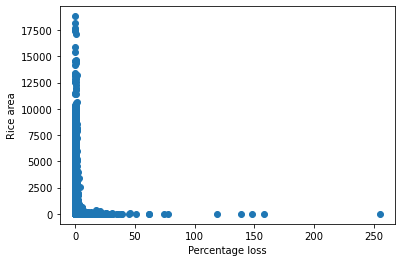

In [57]:
# Plotting the percentage loss against the rice area
# Shows that the incorrect measurements are for small rice area observations
# When the area is small, the obtained percentage loss has a higher error margin
# Measurement error results in large percentage loss errors
plt.scatter(x=df_total['perc_loss'], y=df_total['rice_area'])
plt.xlabel('Percentage loss')
plt.ylabel('Rice area')
plt.show()

# Remove observations with rice area below 30 ha because these can be inaccurate
df_total = df_total[~((df_total['rice_area'] <= 30) & (df_total['perc_loss'].notnull())) ]

The number of observations for which the percentage loss is above 100% is 572


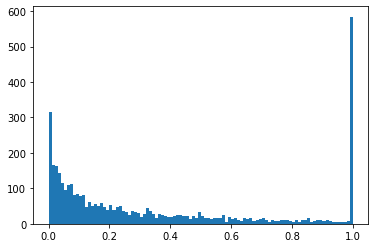

In [58]:
# Replace with 1 when damage > 1
full_loss_count = len(df_total[df_total["perc_loss"] > 1])
print(
    f"The number of observations for which the percentage loss is above 100% is {full_loss_count}"
)

df_total['perc_loss'] = [1 if x > 1 else x for x in df_total['perc_loss']]

plt.hist(df_total['perc_loss'], bins=100)
plt.show()

## Add geographic data

In [59]:
#TODO Add info on measurement units
df_total["mean_slope"] = ""
df_total["mean_elevation_m"] = ""
df_total["ruggedness_stdev"] = ""
df_total["mean_ruggedness"] = ""
df_total["slope_stdev"] = ""
df_total["area_km2"] = ""
df_total["poverty_perc"] = ""
df_total["with_coast"] = ""
df_total["coast_length"] = ""
df_total["perimeter"] = ""
df_total["glat"] = ""
df_total["glon"] = ""

for i in municipalities:

    index = mun_geo_data.index[mun_geo_data["mun_code"] == i].values[0]
    index_total = df_total.index[df_total["mun_code"] == i].tolist()
    
    df_total.loc[index_total, "mean_slope"] = mun_geo_data["mean_slope"][index]
    df_total.loc[index_total, "mean_elevation_m"] = mun_geo_data["mean_elevation_m"][
        index
    ]
    df_total.loc[index_total, "ruggedness_stdev"] = mun_geo_data["ruggedness_stdev"][
        index
    ]
    df_total.loc[index_total, "mean_ruggedness"] = mun_geo_data["mean_ruggedness"][
        index
    ]
    df_total.loc[index_total, "slope_stdev"] = mun_geo_data["slope_stdev"][index]
    df_total.loc[index_total, "area_km2"] = mun_geo_data["area_km2"][index]
    df_total.loc[index_total, "poverty_perc"] = mun_geo_data["poverty_perc"][index]
    df_total.loc[index_total, "with_coast"] = mun_geo_data["with_coast"][index]
    df_total.loc[index_total, "coast_length"] = mun_geo_data["coast_length"][index]
    df_total.loc[index_total, "perimeter"] = mun_geo_data["perimeter"][index]
    df_total.loc[index_total, "glat"] = mun_geo_data["glat"][index]
    df_total.loc[index_total, "glon"] = mun_geo_data["glon"][index]

df_total["coast_peri_ratio"] = df_total["coast_length"] / df_total["perimeter"]

## Add Rainfall Data

In [60]:
# Loading data sheets
path = "IBF_typhoon_model/data/rainfall_data/rainfall_max_6h.csv"
df_rainfall_6h = pd.read_csv(path)
path = "IBF_typhoon_model/data/rainfall_data/rainfall_max_24h.csv"
df_rainfall_24h = pd.read_csv(path)

# Adding the rainfall data to the total df
df_total = pd.merge(
    df_total,
    df_rainfall_6h,
    how="left",
    left_on=["mun_code", "typhoon"],
    right_on=["mun_code", "typhoon"],
)

df_total = pd.merge(
    df_total,
    df_rainfall_24h,
    how="left",
    left_on=["mun_code", "typhoon"],
    right_on=["mun_code", "typhoon"],
)


## Add Windspeed and Track Distance Data

In [64]:
#Adding the wind data
df_total["vmax"] = ""
df_total["dis_track_min"] = ""

for typhoon in typhoons:

    # Path to the rainfall excel sheet per typhoon
    wind_path = os.path.join(
        cdir,
        "IBF_typhoon_model\\data\\wind_data\\output",
        typhoon +
        "_windgrid_output.csv",
    )
    df_temp = pd.read_csv(wind_path)
    
    for mun in municipalities:
        
        try:
            vmax = df_temp.loc[df_temp["adm3_pcode"] == mun, "v_max"].values[0]
            dis_track_min = df_temp.loc[df_temp["adm3_pcode"] == mun, "dis_track_min"].values[0]
        except:
            vmax = np.nan
            dis_track_min = np.nan
        
        df_total.loc[
            (df_total["typhoon"] == typhoon) & (df_total["mun_code"] == mun),
            "vmax",
        ] = vmax

        df_total.loc[
            (df_total["typhoon"] == typhoon) & (df_total["mun_code"] == mun),
            "dis_track_min",
        ] = dis_track_min

## Adding zeros and selecting data

In [100]:
#Drop outlier
#TODO do this in source file
i = df_total[
    ((df_total.mun_code == "PH072251000") & (df_total.typhoon == "lingling2014"))
].index
df_total = df_total.drop(i)

# Drop observations for which no distance is observed --> means that distance > 500 km
df_total = df_total[df_total['dis_track_min'] <= 500]

C:\Users\Marieke\anaconda3\envs\Rice_Field_Damage_Philippines\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


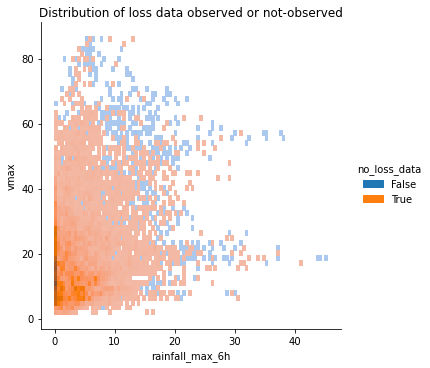

In [111]:
# Create copy of percentage loss for manipulations
df_total['perc_loss_new'] = df_total['perc_loss']

#%% Set zeros to missing --> looking for damage threshold
df_total["perc_loss_new"] = df_total["perc_loss_new"].replace(0, np.nan)

# Setting small observations to no damage observed --> damage can be disregarded if very small
df_total.perc_loss_new[df_total['perc_loss_new'] < 0.05] = np.nan

#%% create new boolean column for missing loss data
df_total["no_loss_data"] = df_total["perc_loss_new"].apply(lambda x: pd.isna(x))

#%% Plotting for all data points
# Can clearly see there is more often no loss data for lower rainfall and windspeed combinations
sns.displot(df_total, x="rainfall_max_6h", y="vmax", hue="no_loss_data")
plt.title("Distribution of loss data observed or not-observed")
plt.show()

In [112]:
df_total.perc_loss_new[df_total['perc_loss_new'] < 0.05]

Series([], Name: perc_loss_new, dtype: float64)

C:\Users\Marieke\anaconda3\envs\Rice_Field_Damage_Philippines\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


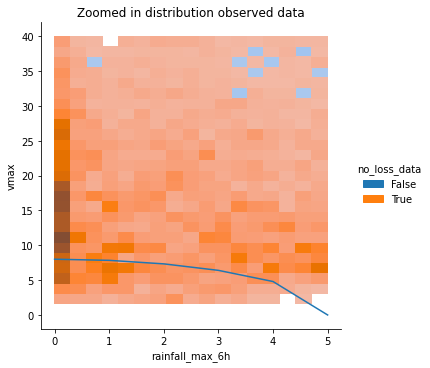

In [116]:
# Plot the damage observations contour plot to see what boundary can be set
df_plot = df_total[df_total['no_loss_data']==False]
df_plot = df_total.copy()

# Reduce the data size for plotting  only relevant part
df_plot_new = df_plot[(df_plot["vmax"] < 40) & (df_plot["rainfall_max_6h"] < 5)]
sns.displot(df_plot_new, x="rainfall_max_6h", y="vmax", hue='no_loss_data')

x_max = 5
y_max = 8

xarr, yarr = [], []
for i in range(200):
    xs = i
    y = np.sqrt(x_max ** 2 - xs ** 2) * (y_max / x_max)
    ys = y
    xarr.append(xs)
    yarr.append(ys)

sns.lineplot(x=xarr, y=yarr)

# # Estimate the line should be around 15
# plt.axvline(20, 0,80)

plt.title("Zoomed in distribution observed data")
plt.show()


In [98]:
df_plot_new = df_plot[(df_plot["vmax"] < 10) & (df_plot["rainfall_max_24h"] < 5)]
df_plot_new[df_plot_new['perc_loss'].notnull()]
df_total.head()

,mun_code,typhoon,area_affected,storm_id,year,reg_code,prov_code,rice_area,perc_loss,mean_slope,...,perimeter,glat,glon,coast_peri_ratio,rainfall_max_6h,rainfall_max_24h,vmax,dis_track_min,perc_loss_new,no_loss_data
0,PH142708000,danas2019,NaN,2019195N13136,2019.0,PH140000000,PH142700000,116.20,NaN,11.92,...,124891,6.168,125.35,0.125926,3.779167,2.101875,8.32173,210.085,NaN,True
1,PH142708000,goni2015,0.0,2015226N12151,2015.0,PH140000000,PH142700000,124.72,0.0,10.35,...,105675,7.475,124.58,0,2.863333,2.347917,11.2958,271.221,NaN,True
2,PH142708000,haima2016,NaN,2016288N07145,2016.0,PH140000000,PH142700000,81.64,NaN,3.83,...,110301,7.169,124.62,0,15.137500,5.833404,33.8716,91.221,NaN,True
3,PH142708000,kammuri2019,NaN,2019329N09160,2019.0,PH140000000,PH142700000,134.52,NaN,6.55,...,58381,7.264,125.06,0,0.409167,0.102292,6.89175,413.163,NaN,True
4,PH142708000,ketsana2009,NaN,2009268N14128,2009.0,PH140000000,PH142700000,124.36,NaN,10.24,...,142625,7.353,125.17,0,10.335000,5.046250,17.8102,135.656,NaN,True


In [75]:
# Check of setting boundary at 20
# Damage for two observations, but for both it is less than 1 percent
df_total[(df_total['rainfall_max_6h']<2) & (df_total['perc_loss'].notnull())]

,mun_code,typhoon,area_affected,storm_id,year,reg_code,prov_code,rice_area,perc_loss,mean_slope,...,perimeter,glat,glon,coast_peri_ratio,rainfall_max_6h,rainfall_max_24h,vmax,dis_track_min,perc_loss_new,no_loss_data
17,PH142708000,yutu2018,310.67,2018294N08161,2018.0,PH140000000,PH142700000,121.80,1.000000,9.36,...,150006,6.612,124.44,0,1.969167,0.512766,48.7005,2.68859,1.000000,False
637,PH142704000,kammuri2019,0.00,2019329N09160,2019.0,PH140000000,PH142700000,241.16,0.000000,10.89,...,46272,10.166,124.96,0.38989,0.336458,0.084115,7.20489,401.052,NaN,True
651,PH142704000,yutu2018,169.70,2018294N08161,2018.0,PH140000000,PH142700000,192.48,0.881650,6.92,...,67650,12.44,125.2,0.221478,1.127083,0.294149,44.1056,1.77091,0.881650,False
989,PH143211000,kammuri2019,375.00,2019329N09160,2019.0,PH140000000,PH143200000,1535.32,0.244249,7.14,...,60128,11.321,124.84,0.106939,0.193056,0.067361,5.31868,479.735,0.244249,False
1540,PH012803000,kalmaegi2014,1000.00,2014254N10142,2014.0,PH010000000,PH012800000,2092.80,0.477829,8.82,...,38511,8.088,124.28,0,1.602083,1.016146,37.2265,8.13583,0.477829,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14688,PH103519000,washi2011,164.70,2011346N03156,2011.0,PH100000000,PH103500000,700.80,0.235017,7.8,...,54903,7.835,123.84,0,0.563333,0.186250,20.441,83.1398,0.235017,False
14692,PH104214000,bopha2012,6.00,2012331N03157,2012.0,PH100000000,PH104200000,38.20,0.157068,11.37,...,66728,8.295,123.75,0.173975,0.312500,0.153819,43.1255,44.8123,0.157068,False
14700,PH103506000,washi2011,68.00,2011346N03156,2011.0,PH100000000,PH103500000,919.60,0.073945,9.22,...,107865,7.794,123.74,0.485728,0.434722,0.182986,20.1538,89.9696,0.073945,False
14721,PH104215000,washi2011,28.20,2011346N03156,2011.0,PH100000000,PH104200000,121.56,0.231984,10.28,...,75484,8.105,123.68,0.389751,1.788333,0.822500,23.1372,57.5726,0.231984,False


In [125]:
# Based on plot --> zeros can be added everywhere where rainfall_max < 20
# Add zeros based on contour plot from finding_zeros.py file
def set_zeros(x):
    vmax_sust = x[0]
    rainfall_max = x[1]
    perc_loss = x[2]

    if pd.notnull(perc_loss):
        value = perc_loss
    elif rainfall_max < 20:
        value = 0
    else:
        value = np.nan
    
    return value

# Number of zeros added
zeros = df_total[(df_total['rainfall_max']<20) & (df_total['perc_loss'].isnull())]
print(f"Number of zeros added to dataframe: {len(zeros)}")

df_total['perc_loss_new'] = df_total[['vmax_sust', 'rainfall_max', 'perc_loss']].apply(set_zeros, axis='columns')

Number of zeros added to dataframe: 441


<IPython.core.display.Javascript object>

In [126]:
# Set the changed percentage loss as the perc_loss column
df_total['perc_loss'] = df_total['perc_loss_new']

<IPython.core.display.Javascript object>

## Final info and changes

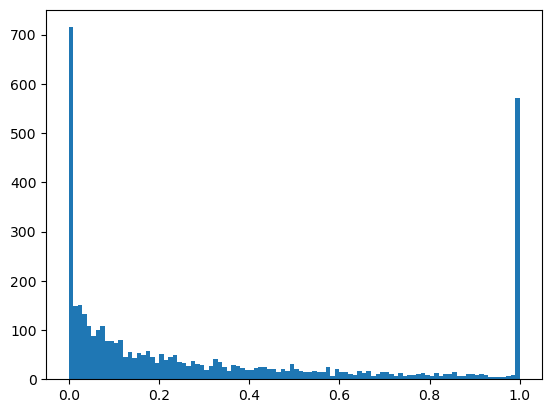

<IPython.core.display.Javascript object>

In [131]:
plt.hist(df_total['perc_loss'], bins=100)
plt.show()

In [128]:
# Drop the rows that contain an NaN
df_total = df_total[df_total['perc_loss'].notnull()]

<IPython.core.display.Javascript object>

In [129]:
df_total.head()

,mun_code,typhoon,area_affected,storm_id,year,reg_code,prov_code,rice_area,perc_loss,mean_slope,...,glat,glon,coast_peri_ratio,rainfall_sum,rainfall_max,vmax_sust,dis_track_min,v_max,perc_loss_new,no_loss_data
1,PH142708000,goni2015,0.00,2015226N12151,2015,PH140000000,PH142700000,124.72,0.000000,10.35,...,7.475,124.58,0,207.12,47.52,26.5682,271.221,11.3056,0.000000,True
7,PH142708000,mangkhut2018,104.31,2018250N12170,2018,PH140000000,PH142700000,236.24,0.441542,6.89,...,7.483,124.71,0,245.76,105.84,53.4344,111.247,22.738,0.441542,False
16,PH142708000,vamco2020,89.73,2020314N12131,2020,PH140000000,PH142700000,135.40,0.662703,13.79,...,5.785,125.34,0.458986,198.24,106.32,25.3609,199.648,10.7919,0.662703,False
17,PH142708000,yutu2018,310.67,2018294N08161,2018,PH140000000,PH142700000,121.80,1.000000,9.36,...,6.612,124.44,0,132.24,85.2,114.546,2.68859,48.7429,1.000000,False
19,PH142707000,goni2015,0.00,2015226N12151,2015,PH140000000,PH142700000,6568.80,0.000000,15.73,...,6.51,124.16,0.39655,180.8,49.6,27.7591,264.924,11.8124,0.000000,True


<IPython.core.display.Javascript object>

## Save to excel file

In [99]:
df_total.to_excel(
    "IBF_typhoon_model\\data\\restricted_data\\combined_input_data\\input_data_05.xlsx", index=False
)

In [134]:
df_total.columns

Index(['mun_code', 'typhoon', 'area_affected', 'storm_id', 'year', 'reg_code',
       'prov_code', 'rice_area', 'perc_loss', 'mean_slope', 'mean_elevation_m',
       'ruggedness_stdev', 'mean_ruggedness', 'slope_stdev', 'area_km2',
       'poverty_perc', 'with_coast', 'coast_length', 'perimeter', 'glat',
       'glon', 'coast_peri_ratio', 'rainfall_sum', 'rainfall_max', 'vmax_sust',
       'dis_track_min', 'v_max', 'perc_loss_new', 'no_loss_data'],
      dtype='object')

<IPython.core.display.Javascript object>

In [ ]:
['rice_area', 'mean_slope', 'mean_elevation_m', 'ruggedness_stdev', 'mean_ruggedness', 'slope_stdev', 'area_km2', 'poverty_perc', 'with_coast', 'coast_length', 'perimeter', 'glat',
       'glon', 'coast_peri_ratio', 'rainfall_sum', 'rainfall_max', 'dis_track_min', 'v_max']